In [77]:
### Spacecraft State Prediction utilizing DNN model
# Examples: from IMU for example acceleration ax,ay,az
# Time Data from internal clock
# Train on Target Data x,y,z,vx,vy,vz

In [78]:
# Import Modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import keras
import itertools
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, r2_score
from matplotlib.animation import FuncAnimation
from ipynb.fs.full.funcCR3BP import CR3BP

In [79]:
# CR3BP Constants
mu = 1.215058560962404E-2 
DU = 389703 
TU = 382981

In [80]:
# Load Data
# Data can either be saved and load or solve using Python_IVP Solver
data_output = np.load("TrainData_Artemis.npy").T
time_data = np.load("TrainData_Time.npy")
acceleration_data = np.load("Artemis_Acceleration_Data.npy")

# Concentrate Time and Acceleration Data:
data_input = np.concatenate((time_data.reshape(-1,1), acceleration_data), 1) # Time and Acceleration

# Display Shape
display(data_output.shape) # Rows are the states and columns are time
display(time_data.shape)
display(acceleration_data.shape)
display(data_input.shape)

(878, 6)

(878,)

(878, 3)

(878, 4)

In [81]:
# Train with Different Types of Data: Acceleration Only, Acceleration + Time
# Train with Acceleration Data: 
# Split Data to 70/30 Train Set
Xdata, ydata = data_input, data_output
X_train, X_test, y_train, y_test = train_test_split(
    Xdata, ydata,
    test_size=0.30,
    train_size=0.70)

# Display Data
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (614, 4)
X_test shape : (264, 4)
y_train shape : (614, 6)
y_test shape : (264, 6)


In [82]:
# Construct Deep Neural Network
model = Sequential()
model.add(keras.Input(shape = (4,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(6))
opt = keras.optimizers.Adam(learning_rate = 0.001) # Optimizer = ADAM
model.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['accuracy']) # Mean Squared Error = Loss
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 512)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,581,574 (6.03 MB)

 Trainable params: 1,581,574 (6.03 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Fit model for time + acceleration inputs
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), verbose = 3) 

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [84]:
# Predict the Model
y_pred = model.predict(X_test) # Predicition
#Summarize the first 100 Cases
#for i in range(100):
    #print('Predicted: '+ str(y_pred[i]) + " => " + 'Expected: ' + str(y_test[i]))
display(y_pred.shape)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


(264, 6)

In [85]:
# Calculate the coefficient of determination. 
R2_Test = r2_score(y_test, y_pred)
print("R2 Score for the Testing Set (Acceleration Model) is:", R2_Test)

R2 Score for the Testing Set (Acceleration Model) is: 0.9963512379365054


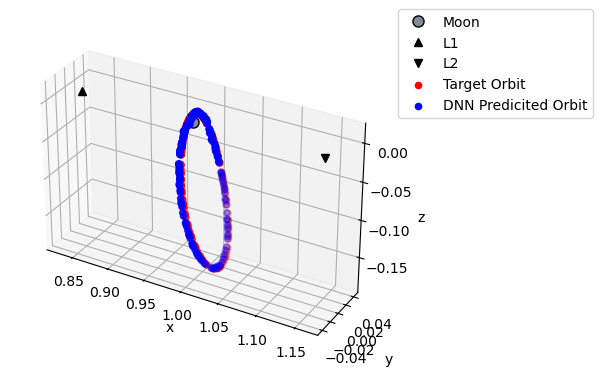

In [86]:
### Plot Orbits of Both Runge Kutta 4th Order and Supervised Learning: 
# %matplotlib widget
L1, L2 = [0.83691513, 0, 0], [1.15568217, 0, 0]

fig = plt.figure()
ax = plt.axes(projection = '3d')
    
ax.plot(1-mu, 0, 0, 'o', ms = 8, mec = 'k', mfc = '#808b96', label = 'Moon') # Plotting Moon
ax.plot(L1[0], L1[1], L1[2], '^', color = 'k', label = 'L1') # Plot L1
ax.plot(L2[0], L2[1], L2[2], 'v', color = 'k', label = 'L2') 
ax.scatter(y_test[:,0], y_test[:,1], y_test[:,2], label = 'Target Orbit', color = 'red') # Actual Trajectory 
ax.scatter(y_pred[:,0], y_pred[:,1], y_pred[:,2], label = 'DNN Predicited Orbit', color = 'blue') # Machine Learning Trajectory

# Set Axes Label
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
    
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# This code will save the plot as a animated gif
# Comment out if do not want to save
# angle = 0
# def update(frame): 
#     ax.view_init(30,frame)
#     return fig

# ani = FuncAnimation(fig, update, frames = np.arange(0, 360, 2), interval = 50)
# ani.save("Test1_Epoch100_Neurons512_Layers7.gif", writer ='pillow')
plt.show()

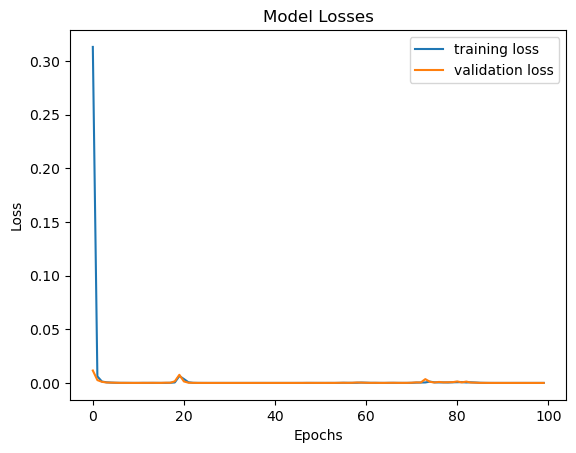

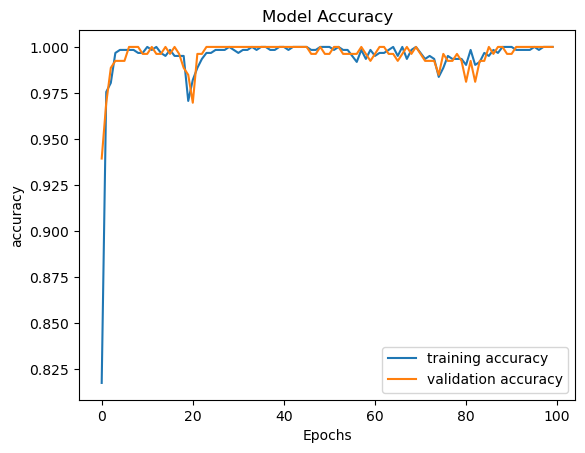

In [87]:
# Plot Graphs: 
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Losses')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['training loss', 'validation loss'])
plt.show()

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()